In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import altair as alt
import io

In [ ]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()




Saving date.xlsx to date.xlsx


Saving other2.xlsx to other2.xlsx


Saving return2.xlsx to return2.xlsx


In [ ]:
data=pd.read_excel('new.xlsx')
data
df1=data.drop(["HSI_adjclose"],axis=1)
df1

,HSI_DIF,SP500_DIF,0012_DIF,0017_DIF,labels
0,554.580016,68.115928,1.134753,1.428546,DOWN
1,487.637332,63.421689,1.037751,1.343481,DOWN
2,415.474735,60.139958,0.887641,1.230198,UP
3,333.500075,56.195078,0.689557,1.166225,UP
4,362.651968,55.505282,0.722841,1.237885,UP
...,...,...,...,...,...
231,44.098094,114.239948,0.239551,-0.109900,DOWN
232,142.328776,114.548737,0.307385,-0.180235,DOWN
233,337.805626,130.854694,0.438122,-0.125333,UP
234,520.034756,133.890462,0.526485,-0.079306,DOWN


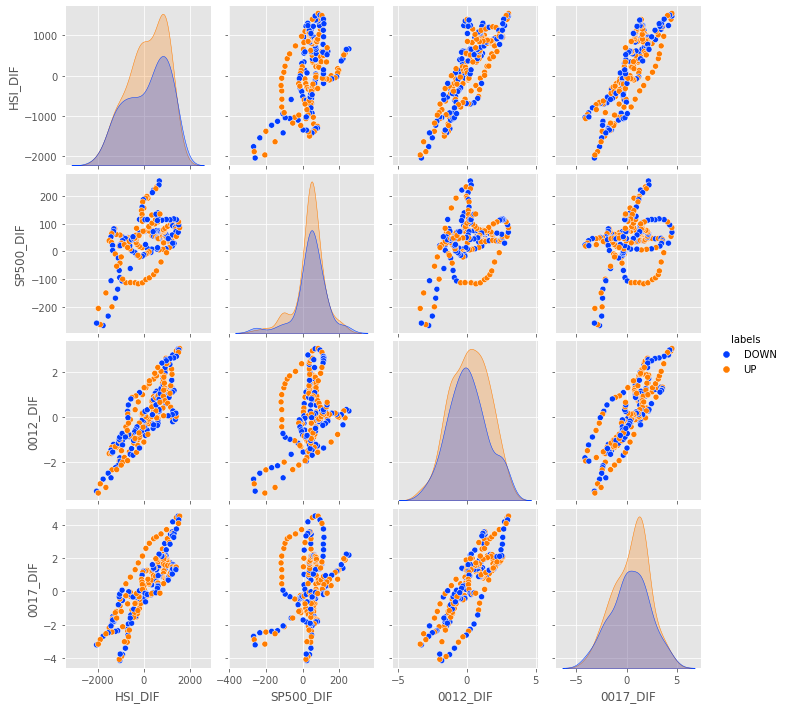

In [ ]:
sns.pairplot(df1, hue="labels",palette="bright")

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
feature_cols = ['HSI_DIF', 'SP500_DIF', '0012_DIF', '0017_DIF']
X = df1[feature_cols] # Features
y = df1.labels # Target variable

print("Features:", X.columns)
print("Target:", y.name)

Features: Index(['HSI_DIF', 'SP500_DIF', '0012_DIF', '0017_DIF'], dtype='object')
Target: labels


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = Normalizer(norm = 'l2')
scaler.fit(X_train)
X_normalized = scaler.transform(X_train)
X_normalized = pd.DataFrame(X_normalized, columns=X_train.columns)
print("Training feature size:", X_normalized.shape)
print("Testing feature size:", X_test.shape)
X_normalized

Training feature size: (188, 4)
Testing feature size: (48, 4)


,HSI_DIF,SP500_DIF,0012_DIF,0017_DIF
0,0.992536,0.121908,0.002031,0.002557
1,0.994963,0.100188,0.002276,0.002508
2,0.998313,0.057947,0.002740,0.002216
3,-0.997981,0.063498,-0.001387,-0.000067
4,0.997987,0.063332,0.001963,0.002855
...,...,...,...,...
183,-0.990441,-0.137921,-0.001557,-0.001514
184,0.632812,-0.773992,0.009784,0.019719
185,0.998555,0.053634,0.002695,0.002215
186,0.991558,-0.129483,0.003329,0.006030


In [ ]:
#Tree
from sklearn import tree

dtree = tree.DecisionTreeClassifier(max_depth=5)
dtree = dtree.fit(X_train,y_train)

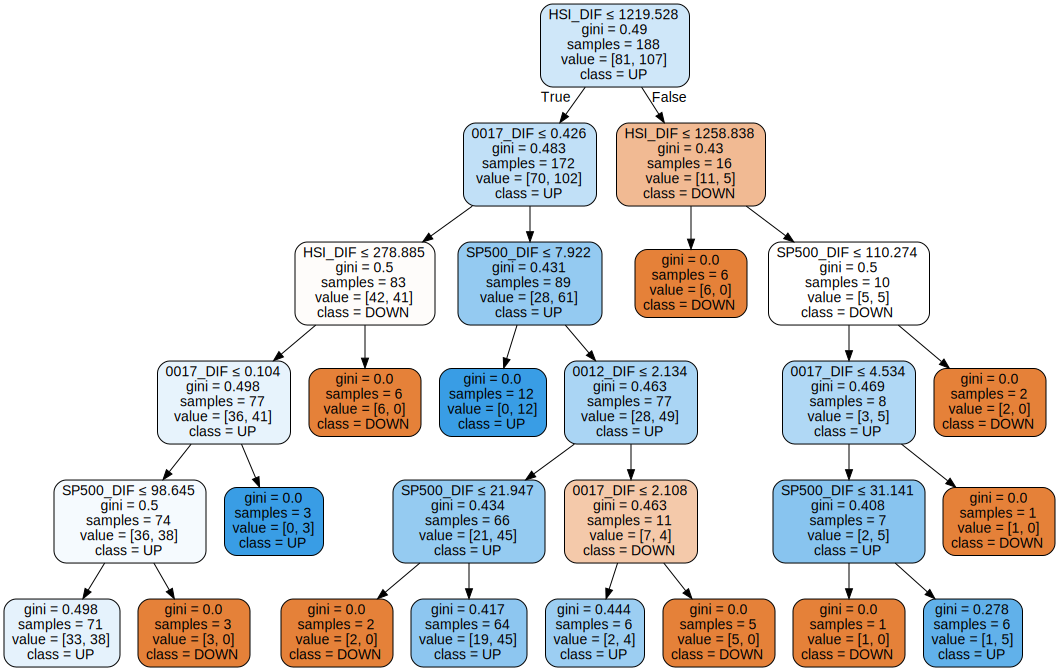

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("imbal") 

dot_data = tree.export_graphviz(dtree, out_file=None, 
                      feature_names=feature_cols,  
                      class_names=["DOWN", "UP"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [ ]:
y_dtree_pred_train = dtree.predict(X_train)
y_dtree_pred_test = dtree.predict(X_test)

print("Train Accuracy:", metrics.accuracy_score(y_train, y_dtree_pred_train))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_dtree_pred_test))

Train Accuracy: 0.7074468085106383
Test Accuracy: 0.5208333333333334


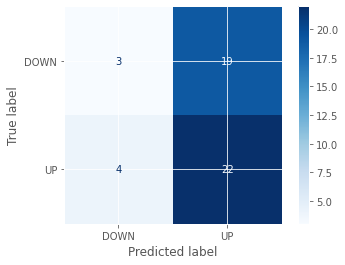

In [ ]:

plot_confusion_matrix(dtree, X_test, y_test, display_labels=["DOWN","UP"], cmap=plt.cm.Blues)

In [ ]:
#SVC
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_svm_pred_train = svm.predict(X_train)
y_svm_pred_test = svm.predict(X_test)

print("Train Accuracy:", metrics.accuracy_score(y_train, y_svm_pred_train))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_svm_pred_test))

Train Accuracy: 0.5851063829787234
Test Accuracy: 0.4583333333333333


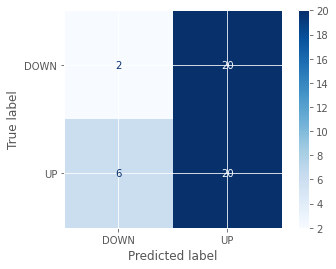

In [ ]:
plot_confusion_matrix(svm, X_test, y_test, display_labels=["DOWN","UP"], cmap=plt.cm.Blues)

In [ ]:
#PCA
from sklearn.decomposition import PCA


# Compress the all DIF (except HSI's) features into one 'principal component' by PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df1[['HSI_DIF', '0012_DIF', '0017_DIF']])
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component'])
principalDf

,principal component
0,-416.223961
1,-349.281164
2,-277.118343
3,-195.143511
4,-224.295505
...,...
231,94.260643
232,-3.969756
233,-199.446388
234,-381.675261


In [ ]:
principaldf1 = pd.concat([principalDf, df1[['SP500_DIF', 'labels']]], axis = 1)
principaldf1

,principal component,SP500_DIF,labels
0,-416.223961,68.115928,DOWN
1,-349.281164,63.421689,DOWN
2,-277.118343,60.139958,UP
3,-195.143511,56.195078,UP
4,-224.295505,55.505282,UP
...,...,...,...
231,94.260643,114.239948,DOWN
232,-3.969756,114.548737,DOWN
233,-199.446388,130.854694,UP
234,-381.675261,133.890462,DOWN


In [ ]:
feature_cols = ['principal component', 'SP500_DIF']
pX = principaldf1[feature_cols] 
py = principaldf1.labels 

print("Features:", pX.columns)
print("Target:", py.name)

pX_train, pX_test, py_train, py_test = train_test_split(pX, py, test_size=0.2, random_state=1)

print("Training feature size:", pX_train.shape)
print("Testing feature size:", pX_test.shape)

Features: Index(['principal component', 'SP500_DIF'], dtype='object')
Target: labels
Training feature size: (188, 2)
Testing feature size: (48, 2)


In [ ]:
#PCA_tree
pDtree = tree.DecisionTreeClassifier(max_depth=5).fit(pX_train, py_train)
py_dtree_pred_train = pDtree.predict(pX_train)
py_dtree_pred_test = pDtree.predict(pX_test)

# accuracy with the PCA feature
print("PCA Train Accuracy:", metrics.accuracy_score(py_train, py_dtree_pred_train))
print("PCA Test Accuracy:", metrics.accuracy_score(py_test, py_dtree_pred_test))

# accuracy without the PCA feature
print("Train Accuracy:", metrics.accuracy_score(y_train, y_dtree_pred_train))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_dtree_pred_test))

PCA Train Accuracy: 0.7393617021276596
PCA Test Accuracy: 0.5
Train Accuracy: 0.7074468085106383
Test Accuracy: 0.5208333333333334


In [ ]:
#PCA_SVC
pSvm = SVC().fit(pX_train, py_train)
py_svm_pred_train = pSvm.predict(pX_train)
py_svm_pred_test = pSvm.predict(pX_test)

print("PCA Train Accuracy:", metrics.accuracy_score(py_train, py_svm_pred_train))
print("PCA Test Accuracy:", metrics.accuracy_score(py_test, py_svm_pred_test))

print("Train Accuracy:", metrics.accuracy_score(y_train, y_svm_pred_train))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_svm_pred_test))

PCA Train Accuracy: 0.5851063829787234
PCA Test Accuracy: 0.4583333333333333
Train Accuracy: 0.5851063829787234
Test Accuracy: 0.4583333333333333


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtree, X_train, y_train, cv=5)
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

scores = cross_val_score(svm, X_train, y_train, cv=5)
print("SVM Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Decision Tree Accuracy: 0.53 (+/- 0.10)
[0.52631579 0.57894737 0.47368421 0.48648649 0.59459459]
SVM Accuracy: 0.55 (+/- 0.05)
[0.55263158 0.57894737 0.5        0.56756757 0.54054054]


In [ ]:
data

,HSI_DIF,SP500_DIF,0012_DIF,0017_DIF,HSI_adjclose,labels
0,554.580016,68.115928,1.134753,1.428546,20794.36914,DOWN
1,487.637332,63.421689,1.037751,1.343481,20706.91992,DOWN
2,415.474735,60.139958,0.887641,1.230198,21561.06055,UP
3,333.500075,56.195078,0.689557,1.166225,22000.49023,UP
4,362.651968,55.505282,0.722841,1.237885,22174.33984,UP
...,...,...,...,...,...,...
231,44.098094,114.239948,0.239551,-0.109900,26728.50000,DOWN
232,142.328776,114.548737,0.307385,-0.180235,26410.58984,DOWN
233,337.805626,130.854694,0.438122,-0.125333,26678.38086,UP
234,520.034756,133.890462,0.526485,-0.079306,26386.56055,DOWN


In [ ]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
import torch   
import torch.nn as nn   

import statsmodels.api as sm 

from tqdm.notebook import tqdm

In [ ]:
Date=pd.read_excel('date.xlsx', parse_dates=True)
Return=pd.read_excel('return.xlsx')
Other=pd.read_excel('other.xlsx')

pca2 = PCA(n_components=1)
principalComponents2 = pca2.fit_transform(df1[['HSI_DIF','SP500_DIF', '0012_DIF', '0017_DIF']])
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component'])
principalDf2

#normalize
scaler = StandardScaler()
principalDf2=pd.DataFrame(scaler.fit_transform(principalDf2), columns=['principal component'])
Return=pd.DataFrame(scaler.fit_transform(Return), columns=['Return'])
Other=pd.DataFrame(scaler.fit_transform(Other), columns=['Volume Change'])


#merge
df2=pd.concat([data,Date[['Date']]], axis=1)
df3=pd.concat([df2,principalDf2[['principal component']]], axis=1)
df4=pd.concat([df3,Return[['Return']]], axis=1)
df4=df4.drop(['HSI_DIF','SP500_DIF', '0012_DIF', '0017_DIF','labels'], axis=1)
df5=pd.concat([df4,Other[['Volume Change']]], axis=1).set_index('Date')
df5

,HSI_adjclose,principal component,Return,Volume Change
Date,,,,
2016-06-24,20794.36914,-0.478672,-0.199757,0.571823
2016-07-01,20706.91992,-0.401659,-0.226219,-1.439213
2016-07-08,21561.06055,-0.318729,1.594034,1.276130
2016-07-15,22000.49023,-0.224513,0.758348,-0.607156
2016-07-22,22174.33984,-0.257915,0.258634,0.002791
...,...,...,...,...
2020-11-27,26728.50000,0.104554,-0.193611,1.594854
2020-12-04,26410.58984,-0.008128,-0.534115,-0.937430
2020-12-11,26678.38086,-0.233137,0.348234,-0.453289


In [ ]:
df5.mean()


HSI_adjclose           2.648212e+04
principal component   -1.646517e-17
Return                -1.411300e-17
Volume Change         -7.056502e-19
dtype: float64

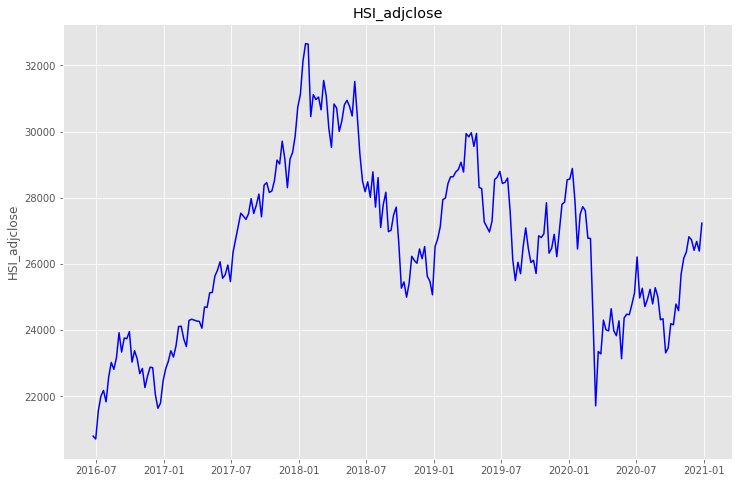

In [ ]:
plt.figure(figsize=(12,8))
plt.ylabel('HSI_adjclose')
plt.xlabel(None) 
plt.title('HSI_adjclose')

plt.plot(df5['HSI_adjclose'], c='blue')
plt.show() 

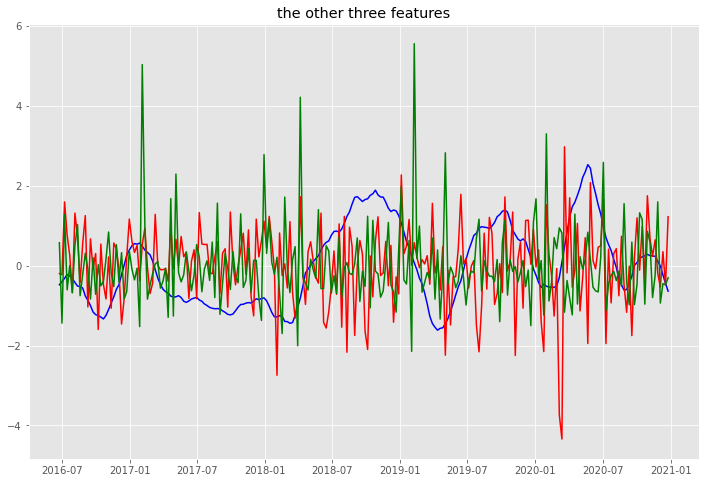

In [ ]:
#this graph is after normalize so it is not showing the real data
plt.figure(figsize=(12,8))
plt.ylabel(None)
plt.xlabel(None) 
plt.title('other three features')

plt.plot(df5['principal component'], c='blue')
plt.plot(df5['Return'], c='red')
plt.plot(df5['Volume Change'], c='green')
plt.show() 

In [ ]:
#features
x_df=df5.drop('HSI_adjclose',axis=1)
x_df

,principal component,Return,Volume Change
Date,,,
2016-06-24,-0.478672,-0.199757,0.571823
2016-07-01,-0.401659,-0.226219,-1.439213
2016-07-08,-0.318729,1.594034,1.276130
2016-07-15,-0.224513,0.758348,-0.607156
2016-07-22,-0.257915,0.258634,0.002791
...,...,...,...
2020-11-27,0.104554,-0.193611,1.594854
2020-12-04,-0.008128,-0.534115,-0.937430
2020-12-11,-0.233137,0.348234,-0.453289


In [ ]:
#target
y_df=df5.iloc[:,:-3]
y_df

,HSI_adjclose
Date,
2016-06-24,20794.36914
2016-07-01,20706.91992
2016-07-08,21561.06055
2016-07-15,22000.49023
2016-07-22,22174.33984
...,...
2020-11-27,26728.50000
2020-12-04,26410.58984
2020-12-11,26678.38086


In [ ]:
# Use the first 52 rows/samples for training and the rest for testing 
testing_percentage = 0.22
training_size = int(df5.shape[0] * (1 - testing_percentage))
training_size

184

In [ ]:
#from DF to Array for lstm
x_ar=x_df.values
scaler = MinMaxScaler()
adjclose=data['HSI_adjclose']
y_df = pd.DataFrame(scaler.fit_transform(y_df),columns=['HSI_adjclose'])
y_ar = y_df.values
y_ar

array([[0.00731944],
       [0.        ],
       [0.07149098],
       [0.10827095],
       [0.12282204],
       [0.09418772],
       [0.15682162],
       [0.19386772],
       [0.17644061],
       [0.20551696],
       [0.26887734],
       [0.22001787],
       [0.25552403],
       [0.25382242],
       [0.27165282],
       [0.19454908],
       [0.22326628],
       [0.2030068 ],
       [0.16543921],
       [0.17846279],
       [0.13023286],
       [0.15916013],
       [0.1817372 ],
       [0.18036532],
       [0.11320169],
       [0.07778004],
       [0.09072924],
       [0.14645451],
       [0.17761828],
       [0.19611092],
       [0.22324699],
       [0.20737339],
       [0.23588314],
       [0.28464289],
       [0.28524219],
       [0.25286821],
       [0.2339095 ],
       [0.29975732],
       [0.30305674],
       [0.30082955],
       [0.29853878],
       [0.29752932],
       [0.28039777],
       [0.33409088],
       [0.3328689 ],
       [0.36983637],
       [0.37075445],
       [0.412

In [ ]:
adjclose=pd.DataFrame(data['HSI_adjclose'],columns=['HSI_adjclose'])
scaler = MinMaxScaler()
adjclose=pd.DataFrame(scaler.fit_transform(adjclose),columns=['HSI_adjclose'])
adjclose=pd.concat([adjclose,Date[['Date']]], axis=1).set_index('Date')
adjclose

,HSI_adjclose
Date,
2016-06-24,0.007319
2016-07-01,0.000000
2016-07-08,0.071491
2016-07-15,0.108271
2016-07-22,0.122822
...,...
2020-11-27,0.504002
2020-12-04,0.477393
2020-12-11,0.499807


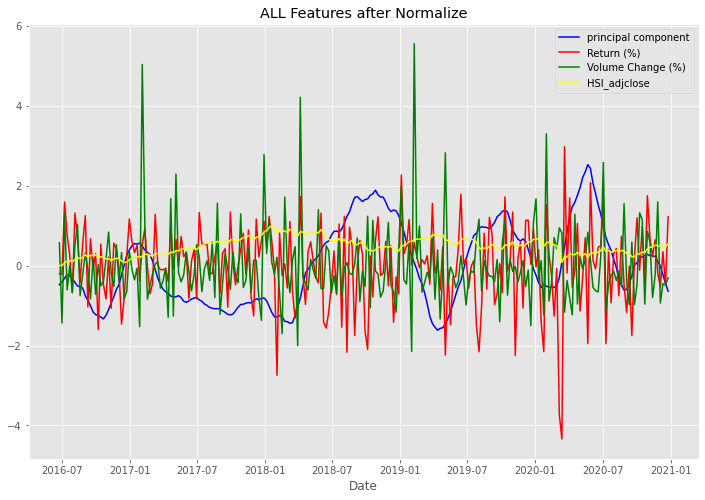

In [ ]:
plt.figure(figsize=(12,8))
plt.ylabel(None)
plt.xlabel('Date') 
plt.title('ALL Features after Normalize')

 
plt.plot(df5['principal component'], c='blue',label='principal component')
plt.plot(df5['Return'], c='red',label='Return (%)')
plt.plot(df5['Volume Change'], c='green',label='Volume Change (%)')
plt.plot(adjclose['HSI_adjclose'], c='yellow', label='HSI_adjclose')
plt.legend()

plt.show() 

,principal component
0,-416.953637
1,-349.870838
2,-277.633642
3,-195.564986
4,-224.660284
...,...
231,91.072993
232,-7.079685
233,-203.076960
234,-385.267647


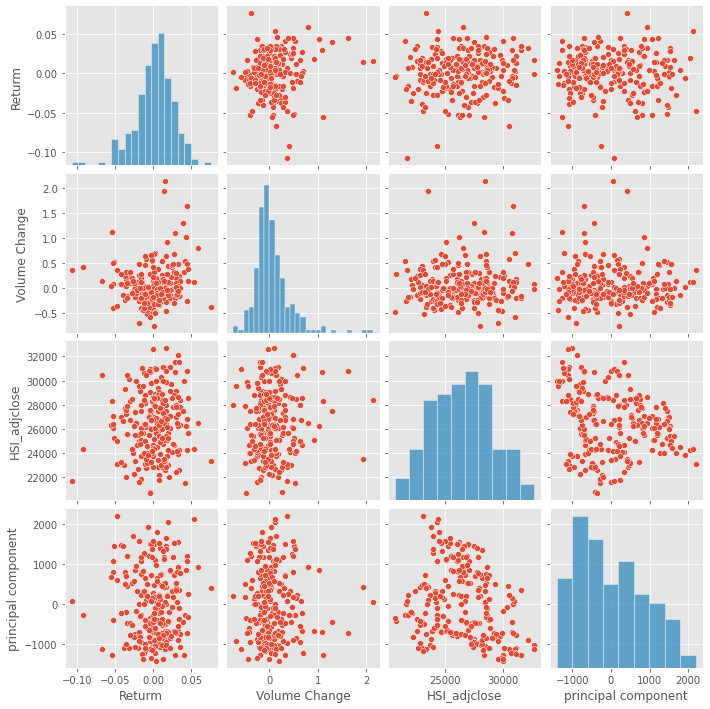

In [ ]:
Date2=pd.read_excel('date.xlsx', parse_dates=True)
Return2=pd.read_excel('return.xlsx')
Other2=pd.read_excel('other.xlsx')
adjclose2=pd.DataFrame(data['HSI_adjclose'],columns=['HSI_adjclose'])
principalComponentsX = pca2.fit_transform(df1[['HSI_DIF','SP500_DIF', '0012_DIF', '0017_DIF']])
principalComponentsX = pd.DataFrame(data = principalComponentsX, columns = ['principal component'])

Cor=pd.concat([Date2,Return2,Other2,adjclose2,principalComponentsX], axis=1).set_index('Date')

sns.pairplot(Cor,palette="bright")
principalComponentsX

In [ ]:
Cor.corr()

,Returm,Volume Change,HSI_adjclose,principal component
Returm,1.000000,0.100637,0.081971,-0.000972
Volume Change,0.100637,1.000000,0.052366,-0.019939
HSI_adjclose,0.081971,0.052366,1.000000,-0.245298
principal component,-0.000972,-0.019939,-0.245298,1.000000


In [ ]:
x_train_ar = x_ar[:training_size, :]
x_test_ar = x_ar[training_size:, :]

y_train_ar = y_ar[:training_size, :]
y_test_ar = y_ar[training_size:, :]

print("Training Dataset Shape", x_train_ar.shape, y_train_ar.shape)
print("Testing Dataset Shape", x_test_ar.shape, y_test_ar.shape)

Training Dataset Shape (184, 3) (184, 1)
Testing Dataset Shape (52, 3) (52, 1)


In [ ]:
#tensor
input_size = 3   # number of features
hidden_size = 15   # number of hidden states
num_layers = 3   # number of LSTM layers
output_size = 1   # number of output classes 
batch_size = 1   # number of samples

In [ ]:
# Turn the training dataset into a tensor
x_train_tensor = torch.Tensor(x_train_ar)
y_train_tensor = torch.Tensor(y_train_ar)

# Turn the testing dataset into a tensor
x_test_tensor = torch.Tensor(x_test_ar)
y_test_tensor = torch.Tensor(y_test_ar)

print("Training Dataset Shape: ", x_train_tensor.shape, y_train_tensor.shape)
print("Testing Dataset Shape: ", x_test_tensor.shape, y_test_tensor.shape)

Training Dataset Shape:  torch.Size([184, 3]) torch.Size([184, 1])
Testing Dataset Shape:  torch.Size([52, 3]) torch.Size([52, 1])


In [ ]:
# Return a properly structured tensor with the following shape 
# [batch size, sequence length, no. of features]

# The new tensor will contain the same data as the original input dataset but of a different shape with batch size equals 1

x_train_3D_tensor = torch.reshape(x_train_tensor, (batch_size, x_train_tensor.shape[0], x_train_tensor.shape[1]))
x_test_3D_tensor = torch.reshape(x_test_tensor, (batch_size, x_test_tensor.shape[0], x_test_tensor.shape[1])) 

# Note that reshaping applies to features only and not the target

print("Training Shape: ", x_train_3D_tensor.shape, y_train_tensor.shape)
print("Testing Shape: ", x_test_3D_tensor.shape, y_test_tensor.shape)

Training Shape:  torch.Size([1, 184, 3]) torch.Size([184, 1])
Testing Shape:  torch.Size([1, 52, 3]) torch.Size([52, 1])


In [ ]:
# Define a be-spoken LSTM RNN 
# nn.Module is the superclass for all neural network modules

class LSTM1(nn.Module):
    
    # __init__ is invoked when a new instance of the class is created
    def __init__(self, output_size, input_size, hidden_size, num_layers, batch_size):

        super(LSTM1, self).__init__()   # Initiate the new instance using the __init__ method of the superclass
        
        self.num_classes = output_size   # Number of output classes, typically 1 for regression
        self.input_size = input_size   # Number of expected features in the input x
        self.hidden_size = hidden_size   # Number of features in the hidden state h 
        self.num_layers = num_layers   # Number of recurrent layers
        self.batch_size = batch_size   # Number of samples
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        
        self.mlp_1 = nn.Linear(hidden_size, 128) # fully connected MLP layer connecting the LSTM layer
        self.mlp_2 = nn.Linear(128, output_size) # fully connected MLP layer producing the output

        self.relu = nn.ReLU()
    
    # Define the forward propagation that takes the input tensor as input
    # input tensor (x) of shape [batch size, sequence length, no. of features]
    def forward(self, x):
        
        # the hidden state tensor and the cell state tensor are of the same shape
        # [no. of layers, batch size, hidden size]
        
        # Create two zero-valued tensors
        h_0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)       
        c_0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)
        
        # Propagate input through the LSTM using the zero-valued hidden and cell state tensors
        # The output includes the prediction tensor "output" having the shape [sequence length, batch size, hidden size]
        # and contains the output features (h_t) from the last layer of the LSTM
        # "h_n" corresponds to the hidden state for t=sequence length
        # "c_n" corresponds to the cell state  for t=sequence length
        
        output, (h_n, c_n) = self.lstm(x, (h_0, c_0))
        
        # flatten the output using a view such that each row represents the hidden state for each input row
        out = output.view(-1, self.hidden_size)

        # ensure values are all positive
        out = self.relu(out)    
        # Connect to the fully connected layers to generate the output
        out = self.mlp_1(out)
        out = self.relu(out)
        out = self.mlp_2(out)
        
        return out, (h_n, c_n)

In [ ]:
# Create DataFrame storing Actual and Predicted values for visualization
y = pd.DataFrame(index=y_df.index, columns=['Actual', 'Predicted'])
y['Actual'] = y_df  # use the same date/time values as index
y

,Actual,Predicted
Date,,
2016-06-24,20794.36914,NaN
2016-07-01,20706.91992,NaN
2016-07-08,21561.06055,NaN
2016-07-15,22000.49023,NaN
2016-07-22,22174.33984,NaN
...,...,...
2020-11-27,26728.50000,NaN
2020-12-04,26410.58984,NaN
2020-12-11,26678.38086,NaN


In [ ]:
#run LSTM
num_epochs = 3500   # number of iterations
learning_rate = 0.01   # learning rate
lstm1 = LSTM1(output_size, input_size, hidden_size, num_layers, batch_size)
print(lstm1)

LSTM1(
  (lstm): LSTM(3, 15, num_layers=3, batch_first=True)
  (mlp_1): Linear(in_features=15, out_features=128, bias=True)
  (mlp_2): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
MSE = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)

In [ ]:
for epoch in tqdm(range(num_epochs), desc='LSTM RNN Training'):

    out, (h_n, c_n) = lstm1(x_train_3D_tensor)   # forward propagation
    
    loss = MSE(out, y_train_tensor)   # obtain the loss based on MSE

    optimizer.zero_grad()   # clear the gradients before backward propagation
    loss.backward(retain_graph=True)   # backward propagation
    
    optimizer.step()   # improve from loss by updating all parameters
    
    if epoch % 100 == 99:
        print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))

Epoch: 100, loss: 0.00429
Epoch: 200, loss: 0.00029
Epoch: 300, loss: 0.00006
Epoch: 400, loss: 0.00003
Epoch: 500, loss: 0.00005
Epoch: 600, loss: 0.00002
Epoch: 700, loss: 0.00001
Epoch: 800, loss: 0.00001
Epoch: 900, loss: 0.00001
Epoch: 1000, loss: 0.00001
Epoch: 1100, loss: 0.00019
Epoch: 1200, loss: 0.00001
Epoch: 1300, loss: 0.00001
Epoch: 1400, loss: 0.00001
Epoch: 1500, loss: 0.00001
Epoch: 1600, loss: 0.00000
Epoch: 1700, loss: 0.00001
Epoch: 1800, loss: 0.00000
Epoch: 1900, loss: 0.00000
Epoch: 2000, loss: 0.00000
Epoch: 2100, loss: 0.00000
Epoch: 2200, loss: 0.00000
Epoch: 2300, loss: 0.00002
Epoch: 2400, loss: 0.00000
Epoch: 2500, loss: 0.00001
Epoch: 2600, loss: 0.00000
Epoch: 2700, loss: 0.00000
Epoch: 2800, loss: 0.00000
Epoch: 2900, loss: 0.00000
Epoch: 3000, loss: 0.00000
Epoch: 3100, loss: 0.00000
Epoch: 3200, loss: 0.00000
Epoch: 3300, loss: 0.00000
Epoch: 3400, loss: 0.00002
Epoch: 3500, loss: 0.00000



In [ ]:
#performanning
y_train_pred, (h_n, c_n) = lstm1(x_train_3D_tensor)   # forward pass on Training Dataset/Tensor
y_train_pred_ar = scaler.inverse_transform(y_train_pred.data.numpy())   # numpy conversion followed by reverse normalization
y.loc[y.index[:training_size], 'Predicted'] = y_train_pred_ar

In [ ]:
y_test_pred, (h_n, c_n) = lstm1(x_test_3D_tensor)   # forward pass on Test Dataset/Tensor
y_test_pred_ar = scaler.inverse_transform(y_test_pred.data.numpy())   # numpy conversion followed by reverse normalization
y.loc[y.index[training_size:], 'Predicted'] = y_test_pred_ar
y

,Actual,Predicted
Date,,
2016-06-24,20794.36914,20801.9
2016-07-01,20706.91992,20710.1
2016-07-08,21561.06055,21568.9
2016-07-15,22000.49023,22015
2016-07-22,22174.33984,22183.2
...,...,...
2020-11-27,26728.50000,29306.8
2020-12-04,26410.58984,28598.6
2020-12-11,26678.38086,28638.9


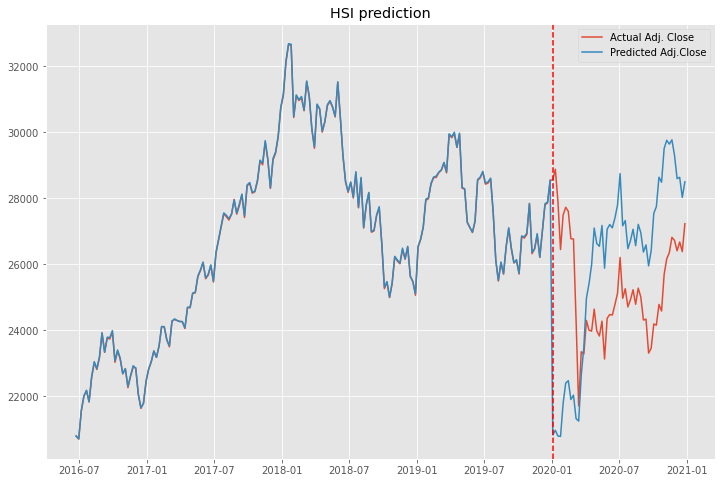

In [ ]:
# Handle date/time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(12,8))   # plotting

plt.plot(y.index.values, y['Actual'], label='Actual Adj. Close')   # actual plot
plt.plot(y.index.values, y['Predicted'], label='Predicted Adj.Close')   # predicted plot
plt.title('HSI prediction')
plt.legend() 
plt.axvline(x=y.index.values[184], c='r', linestyle='--')   # mark the boundary of training and test dataset
plt.show() 

In [ ]:
#since all the classify ML mehtod is not accurate, I would like to suggest use the LSTM model to do the ML part.
# the back testing df is the last 52 row of y
# the data df for back testing as follow
df_back=y[-52:]
print('the size of the df:',df_back.shape)
df_back

the size of the df: (52, 2)


,Actual,Predicted
Date,,
2020-01-03,28561.00000,20834.1
2020-01-10,28883.03906,20971.2
2020-01-17,27909.11914,20798
2020-01-24,26449.13086,20786.2
2020-01-31,27493.69922,21785.1
2020-02-07,27730.00000,22403.2
2020-02-14,27609.16016,22475.9
2020-02-21,26778.61914,21904.4
2020-02-28,26767.86914,22036.5


In [ ]:
#for example, we will but a callable bull 24/1/2020 till 14/2/2020 because our model predicted HSI will will grow in this period. 
#Then, we will purchase a callable bear on 14/2/2020 and sell it on 21/2/2020 bacuase our model predict that HSI will increase at 28/2/2020. 
#Of course, we will purchase a bull on 21/2/2020 and sell it on 28/2/2020 base on the prediction on our moedel.
#after we get the buy and sell points of callable bull and callable bear, we can calculate the earning or loss associate with the actual HSI.
#the cost of our trading is $1000*(numbers of bear + numbers of bull)
#the profit of loss will use the different of Actual HSI between buy and sell point.
#for bull, the P/L is ((Selling point- buying point)/10000)*10000, first 10000 is Entitlement Ratio and second 10000 is the numbers of contract we buy.
#for bear, the P/L is ((buying point - selling point)/10000)*10000
#If we can visualize the buy/sell points, that will be great.

In [ ]:
#the return formular of calculating the return ratio:
#normal formula: (new-old)/old but we will use the advance one, the (P/L)/cost.

#since we assumed the CBBC have same numbers on Entitlement Ratio and numbers of contracts in a lot,
#the P/L of every trade will exactly equal to the difference of the Actual HSIs

#the total P/L we be the sum of every differences and total cost is the numbers of trades*1000
#the total retio formula will be ('the sum of every differences' / 'the numbers of trades'*1000)

#for finding the number of trades of bull/bear, we can just find the total numbers of selling points
#**(but need the check the number of buy and sell are imblance or not, 1 buy point more than selling point is acceptable)**

#please calculate the P/L for bull and bear separately, don't mix them up right now, thank you~

In [ ]:
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# define whether long/short (CBBC)
temp = df_back.iloc[:,1:].values
max = argrelextrema(temp, np.greater)[0]
min = argrelextrema(temp, np.less)[0]

# add column 'signal'
lst = []
for i in range(len(df_back)):
  if i in max: lst.append('Sell/Short')
  elif i in min: lst.append('Buy')
  else: lst.append(None)
df_back['signal'] = lst

# verify the point we execute tradings
import plotly.graph_objects as go
data = go.Scatter(x=df_back.index,
                  y=df_back['Actual'],
                  y0=df_back['Predicted'],
                  text=df_back['signal'],
                  mode='lines+markers+text',
                  marker=dict(color='rgba(48, 217, 189, 1)'),
                  name='citations')

fig = go.Figure(data=data)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# verify if any duplicate signals
def verify_du():
  temp = ''
  for i in range(len(df_back)):
    if df_back.signal[i] is not None:
      if df_back.signal[i] == temp: return False
      else: temp = df_back.signal[i]
  return True

def bull(s,b):
  return ((s-b)/10000)*10000

def bear(s,b):
  return ((b-s)/10000)*10000

In [ ]:
# initiate tradings
if verify_du:
  total_cost = (1000*(len(max)))
  print('Total Cost: ', total_cost) # cost for buying callable bull contacts

  previous = 0
  current = 0
  P_L = 0
  transactions = 0
  for i in range(len(df_back)):
    current = df_back.Actual[i]
    if df_back.signal[i] == 'Buy':
      previous = current
    elif (df_back.signal[i] == 'Sell/Short') and (previous != 0):
      P_L += bull(current, previous)
      transactions += 1
      print('#'+ str(transactions),
            'P/L:', bull(current, previous),
            'Total P/L:', P_L)
      
print('Total ratio formula:', (P_L / total_cost))
  

Total Cost:  15000
#1 P/L: 1160.0292999999983 Total P/L: 1160.0292999999983
#2 P/L: -10.75 Total P/L: 1149.2792999999983
#3 P/L: 2934.4589799999994 Total P/L: 4083.7382799999978
#4 P/L: 450.2890699999989 Total P/L: 4534.027349999997
#5 P/L: 1347.3906199999983 Total P/L: 5881.417969999995
#6 P/L: 1745.2207099999978 Total P/L: 7626.638679999993
#7 P/L: 292.31054999999833 Total P/L: 7918.949229999991
#8 P/L: 520.0800799999997 Total P/L: 8439.02930999999
#9 P/L: 489.7597599999972 Total P/L: 8928.789069999988
#10 P/L: 27.310550000001967 Total P/L: 8956.09961999999
#11 P/L: 1475.060550000002 Total P/L: 10431.160169999992
#12 P/L: 1582.78125 Total P/L: 12013.941419999992
#13 P/L: 462.47851999999693 Total P/L: 12476.419939999989
#14 P/L: 267.7910200000006 Total P/L: 12744.21095999999
Total ratio formula: 0.8496140639999993


In [ ]:
# initiate tradings
if verify_du:
  total_cost = (1000*(len(min)))
  print('Total Cost: ', total_cost) # cost for buying callable bear contacts

  previous = 0
  current = 0
  P_L = 0
  transactions = 0
  for i in range(len(df_back)):
    current = df_back.Actual[i]
    if df_back.signal[i] == 'Sell/Short':
      previous = current
    elif (df_back.signal[i] == 'Buy') and (previous != 0):
      P_L += bear(current, previous)
      transactions += 1
      print('#'+ str(transactions),
            'P/L:', bear(current, previous),
            'Total P/L:', P_L)
      
print('Total ratio formula:', (P_L / total_cost))

Total Cost:  15000
#1 P/L: 2433.908199999998 Total P/L: 2433.908199999998
#2 P/L: 830.5410200000006 Total P/L: 3264.4492199999986
#3 P/L: 5058.738279999998 Total P/L: 8323.187499999996
#4 P/L: 813.8496100000011 Total P/L: 9137.037109999997
#5 P/L: 1147.2695299999978 Total P/L: 10284.306639999995
#6 P/L: 15.210939999997208 Total P/L: 10299.517579999992
#7 P/L: 1239.4707099999978 Total P/L: 11538.98828999999
#8 P/L: 552.4101599999995 Total P/L: 12091.39844999999
#9 P/L: 439.2792899999986 Total P/L: 12530.677739999988
#10 P/L: 967.6113299999997 Total P/L: 13498.289069999988
#11 P/L: 1029.779300000002 Total P/L: 14528.06836999999
#12 P/L: 199.53125 Total P/L: 14727.59961999999
#13 P/L: -187.58984000000055 Total P/L: 14540.00977999999
#14 P/L: 408.859379999998 Total P/L: 14948.869159999987
#15 P/L: 291.8203100000028 Total P/L: 15240.68946999999
Total ratio formula: 1.016045964666666


In [ ]:
###Practical way (somehow overfeeded I think):
#using last week data to predict this week index, like a human.

In [ ]:
data2=pd.read_excel('NEWNEW.xlsx')
Date=pd.read_excel('date.xlsx', parse_dates=True)
Return=pd.read_excel('return2.xlsx')
Other=pd.read_excel('other2.xlsx')

pca3 = PCA(n_components=1)
principalComponents3 = pca3.fit_transform(data2[['HSI_DIF','SP500_DIF', '0012_DIF', '0017_DIF']])
principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['principal component'])
principalDf3

#normalize
scaler = StandardScaler()
principalDf3=pd.DataFrame(scaler.fit_transform(principalDf3), columns=['principal component'])
Return=pd.DataFrame(scaler.fit_transform(Return), columns=['Return'])
Other=pd.DataFrame(scaler.fit_transform(Other), columns=['Volume Change'])

#merge
df6=pd.concat([data2,Date[['Date']]], axis=1)
df7=pd.concat([df6,principalDf3[['principal component']]], axis=1)
df8=pd.concat([df7,Return[['Return']]], axis=1)
df9=df8.drop(['HSI_DIF','SP500_DIF', '0012_DIF', '0017_DIF'], axis=1)
df10=pd.concat([df9,Other[['Volume Change']]], axis=1).set_index('Date')
df10

,HSI_adjclose,principal component,Return,Volume Change
Date,,,,
2016-06-24,20794.36914,-0.370095,1.595549,-0.145506
2016-07-01,20706.91992,-0.480096,-0.200901,0.571228
2016-07-08,21561.06055,-0.403040,-0.227304,-1.440118
2016-07-15,22000.49023,-0.320062,1.588861,1.275644
2016-07-22,22174.33984,-0.225791,0.755052,-0.607933
...,...,...,...,...
2020-11-27,26728.50000,0.230467,0.641819,-0.239312
2020-12-04,26410.58984,0.103483,-0.194769,1.594417
2020-12-11,26678.38086,-0.009265,-0.534508,-0.938258


In [ ]:
#features
x_df2=df10.drop('HSI_adjclose',axis=1)

#target
y_df2=df10.iloc[:,:-3]
x_df2

,principal component,Return,Volume Change
Date,,,
2016-06-24,-0.478672,-0.199757,-0.145506
2016-07-01,-0.401659,-0.226219,0.571228
2016-07-08,-0.318729,1.594034,-1.440118
2016-07-15,-0.224513,0.758348,1.275644
2016-07-22,-0.257915,0.258634,-0.607933
...,...,...,...
2020-11-27,0.104554,-0.193611,-0.239312
2020-12-04,-0.008128,-0.534115,1.594417
2020-12-11,-0.233137,0.348234,-0.938258


In [ ]:
#from DF to Array for lstm
x_ar2=x_df2.values
scaler = MinMaxScaler()
y_ar2 = scaler.fit_transform(y_df2)


x_train_ar2 = x_ar2[:training_size, :]
x_test_ar2 = x_ar2[training_size:, :]

y_train_ar2 = y_ar2[:training_size, :]
y_test_ar2 = y_ar2[training_size:, :]

print("Training Dataset Shape", x_train_ar2.shape, y_train_ar2.shape)
print("Testing Dataset Shape", x_test_ar2.shape, y_test_ar2.shape)

Training Dataset Shape (184, 3) (184, 1)
Testing Dataset Shape (52, 3) (52, 1)


In [ ]:
#tensor
input_size2 = 3   # number of features
hidden_size2 = 15   # number of hidden states
num_layers2 = 3   # number of LSTM layers
output_size2 = 1   # number of output classes 
batch_size2 = 1   # number of samples


# Turn the training dataset into a tensor
x_train_tensor2 = torch.Tensor(x_train_ar2)
y_train_tensor2 = torch.Tensor(y_train_ar2)

# Turn the testing dataset into a tensor
x_test_tensor2 = torch.Tensor(x_test_ar2)
y_test_tensor2 = torch.Tensor(y_test_ar2)

print("Training Dataset Shape: ", x_train_tensor2.shape, y_train_tensor2.shape)
print("Testing Dataset Shape: ", x_test_tensor2.shape, y_test_tensor2.shape)

# Return a properly structured tensor with the following shape 
# [batch size, sequence length, no. of features]

# The new tensor will contain the same data as the original input dataset but of a different shape with batch size equals 1

x_train_3D_tensor2 = torch.reshape(x_train_tensor2, (batch_size2, x_train_tensor2.shape[0], x_train_tensor2.shape[1]))
x_test_3D_tensor2 = torch.reshape(x_test_tensor2, (batch_size2, x_test_tensor2.shape[0], x_test_tensor2.shape[1])) 

# Note that reshaping applies to features only and not the target

print("Training Shape: ", x_train_3D_tensor2.shape, y_train_tensor2.shape)
print("Testing Shape: ", x_test_3D_tensor2.shape, y_test_tensor2.shape)

Training Dataset Shape:  torch.Size([184, 3]) torch.Size([184, 1])
Testing Dataset Shape:  torch.Size([52, 3]) torch.Size([52, 1])
Training Shape:  torch.Size([1, 184, 3]) torch.Size([184, 1])
Testing Shape:  torch.Size([1, 52, 3]) torch.Size([52, 1])


In [ ]:
# Create DataFrame storing Actual and Predicted values for visualization
y2 = pd.DataFrame(index=y_df2.index, columns=['Actual', 'Predicted'])
y2['Actual'] = y_df2  # use the same date/time values as index
y2

,Actual,Predicted
Date,,
2016-06-24,20794.36914,NaN
2016-07-01,20706.91992,NaN
2016-07-08,21561.06055,NaN
2016-07-15,22000.49023,NaN
2016-07-22,22174.33984,NaN
...,...,...
2020-11-27,26728.50000,NaN
2020-12-04,26410.58984,NaN
2020-12-11,26678.38086,NaN


In [ ]:
class LSTM2(nn.Module):
    
    # __init__ is invoked when a new instance of the class is created
    def __init__(self, output_size2, input_size2, hidden_size2, num_layers2, batch_size2):

        super(LSTM2, self).__init__()   # Initiate the new instance using the __init__ method of the superclass
        
        self.num_classes = output_size2   # Number of output classes, typically 1 for regression
        self.input_size = input_size2   # Number of expected features in the input x
        self.hidden_size = hidden_size2   # Number of features in the hidden state h 
        self.num_layers = num_layers2   # Number of recurrent layers
        self.batch_size = batch_size2   # Number of samples
                
        # Deploy the nn.LSTM as the RNN
        
        # Set batch_first=True to dictate the dimensions of the input tensor 
        # Input tensor as [batch_size, seq_len, input_size] instead of [seq_len. batch_size, input_size]
        
        # https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM
        self.lstm2 = nn.LSTM(input_size=input_size2, hidden_size=hidden_size2, num_layers=num_layers2, batch_first=True)
        
        # nn.Linear takes the size of input and size of output as parameters
        # https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        self.mlp_1 = nn.Linear(hidden_size2, 128) # fully connected MLP layer connecting the LSTM layer
        self.mlp_2 = nn.Linear(128, output_size2) # fully connected MLP layer producing the output
        
        # Use ReLU as the activation function
        # https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
        self.relu= nn.ReLU()
    
    # Define the forward propagation that takes the input tensor as input
    # input tensor (x) of shape [batch size, sequence length, no. of features]
    def forward(self, x):
        
        # the hidden state tensor and the cell state tensor are of the same shape
        # [no. of layers, batch size, hidden size]
        
        # Create two zero-valued tensors
        h_0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)       
        c_0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)
        
        # Propagate input through the LSTM using the zero-valued hidden and cell state tensors

        # The output includes the prediction tensor "output" having the shape [sequence length, batch size, hidden size]
        # and contains the output features (h_t) from the last layer of the LSTM
        
        # "h_n" corresponds to the hidden state for t=sequence length
        # "c_n" corresponds to the cell state  for t=sequence length
        
        output, (h_n, c_n) = self.lstm2(x, (h_0, c_0))
        
        # flatten the output using a view such that each row represents the hidden state for each input row
        out = output.view(-1, self.hidden_size)

        # ensure values are all positive
        out = self.relu(out)   
        
        # Connect to the fully connected layers to generate the output
        out = self.mlp_1(out)
        out = self.relu(out)
        out = self.mlp_2(out)
        
        return out, (h_n, c_n)

In [ ]:
#run LSTM
num_epochs2 = 3500   # number of iterations
learning_rate2 = 0.01   # learning rate
lstm2 = LSTM2(output_size, input_size, hidden_size, num_layers, batch_size)
print(lstm2)

MSE2 = torch.nn.MSELoss()    # mean-squared error for regression
optimizer2 = torch.optim.Adam(lstm2.parameters(), lr=learning_rate2)

LSTM2(
  (lstm2): LSTM(3, 15, num_layers=3, batch_first=True)
  (mlp_1): Linear(in_features=15, out_features=128, bias=True)
  (mlp_2): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
for epoch in tqdm(range(num_epochs2), desc='LSTM RNN Training'):

    out, (h_n, c_n) = lstm2(x_train_3D_tensor2)   # forward propagation
    
    loss2 = MSE2(out, y_train_tensor2)   # obtain the loss based on MSE

    optimizer2.zero_grad()   # clear the gradients before backward propagation
    loss2.backward(retain_graph=True)   # backward propagation
    
    optimizer2.step()   # improve from loss by updating all parameters
    
    if epoch % 100 == 99:
        print("Epoch: %d, loss: %1.5f" % (epoch+1, loss2.item()))

Epoch: 100, loss: 0.00515
Epoch: 200, loss: 0.00017
Epoch: 300, loss: 0.00009
Epoch: 400, loss: 0.00003
Epoch: 500, loss: 0.00003
Epoch: 600, loss: 0.00030
Epoch: 700, loss: 0.00001
Epoch: 800, loss: 0.00001
Epoch: 900, loss: 0.00004
Epoch: 1000, loss: 0.00005
Epoch: 1100, loss: 0.00001
Epoch: 1200, loss: 0.00001
Epoch: 1300, loss: 0.00001
Epoch: 1400, loss: 0.00002
Epoch: 1500, loss: 0.00003
Epoch: 1600, loss: 0.00023
Epoch: 1700, loss: 0.00001
Epoch: 1800, loss: 0.00018
Epoch: 1900, loss: 0.00000
Epoch: 2000, loss: 0.00001
Epoch: 2100, loss: 0.00000
Epoch: 2200, loss: 0.00002
Epoch: 2300, loss: 0.00001
Epoch: 2400, loss: 0.00001
Epoch: 2500, loss: 0.00000
Epoch: 2600, loss: 0.00000
Epoch: 2700, loss: 0.00000
Epoch: 2800, loss: 0.00008
Epoch: 2900, loss: 0.00000
Epoch: 3000, loss: 0.00000
Epoch: 3100, loss: 0.00003
Epoch: 3200, loss: 0.00017
Epoch: 3300, loss: 0.00000
Epoch: 3400, loss: 0.00016
Epoch: 3500, loss: 0.00000



In [ ]:
#performanning
y_train_pred2, (h_n, c_n) = lstm2(x_train_3D_tensor2)   # forward pass on Training Dataset/Tensor
y_train_pred_ar2 = scaler.inverse_transform(y_train_pred2.data.numpy())   # numpy conversion followed by reverse normalization
y2.loc[y2.index[:training_size], 'Predicted'] = y_train_pred_ar2

y_test_pred2, (h_n, c_n) = lstm2(x_test_3D_tensor2)   # forward pass on Test Dataset/Tensor
y_test_pred_ar2 = scaler.inverse_transform(y_test_pred2.data.numpy())   # numpy conversion followed by reverse normalization
y2.loc[y2.index[training_size:], 'Predicted'] = y_test_pred_ar2
y2

,Actual,Predicted
Date,,
2016-06-24,20794.36914,20801.6
2016-07-01,20706.91992,20698.2
2016-07-08,21561.06055,21554.6
2016-07-15,22000.49023,22011.8
2016-07-22,22174.33984,22158.9
...,...,...
2020-11-27,26728.50000,27967.9
2020-12-04,26410.58984,27557.8
2020-12-11,26678.38086,27584.3


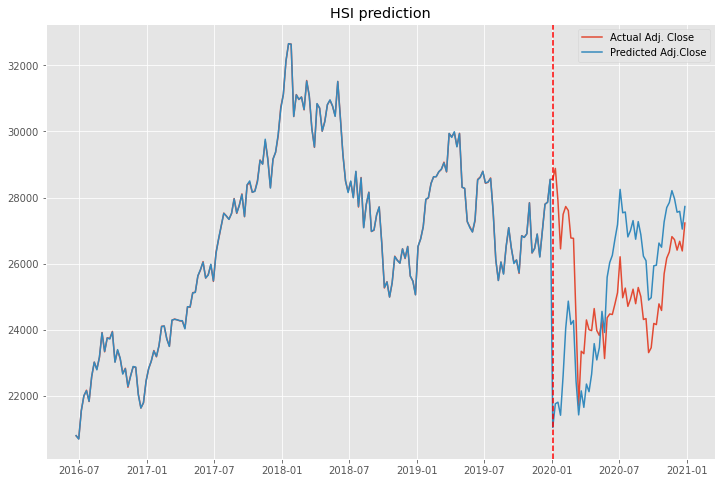

In [ ]:
# Handle date/time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(12,8))   # plotting

plt.plot(y2.index.values, y2['Actual'], label='Actual Adj. Close')   # actual plot
plt.plot(y2.index.values, y2['Predicted'], label='Predicted Adj.Close')   # predicted plot
plt.title('HSI prediction')
plt.legend() 
plt.axvline(x=y.index.values[184], c='r', linestyle='--')   # mark the boundary of training and test dataset
plt.show() 

In [ ]:
#since all the classify ML mehtod is not accurate, I would like to suggest use the LSTM model to do the ML part.
# the back testing df is the last 52 row of y
# the data df for back testing as follow
df_back2=y2[-52:]
print('the size of the df:',df_back2.shape)
df_back2

the size of the df: (52, 2)


,Actual,Predicted
Date,,
2020-01-03,28561.00000,21046.7
2020-01-10,28883.03906,21765.2
2020-01-17,27909.11914,21811.9
2020-01-24,26449.13086,21417.9
2020-01-31,27493.69922,22617.4
2020-02-07,27730.00000,24045.4
2020-02-14,27609.16016,24868.3
2020-02-21,26778.61914,24165.4
2020-02-28,26767.86914,24282.3


In [ ]:
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# define whether long/short (CBBC)
temp = df_back2.iloc[:,1:].values

# add column 'signal'
lst = []
for i in range(len(df_back2)):
  if i in max: lst.append('Sell/Short')
  elif i in min: lst.append('Buy')
  else: lst.append(None)
df_back2['signal'] = lst

# verify the point we execute tradings
import plotly.graph_objects as go
data = go.Scatter(x=df_back2.index,
                  y=df_back2['Actual'],
                  y0=df_back2['Predicted'],
                  text=df_back2['signal'],
                  mode='lines+markers+text',
                  marker=dict(color='rgba(48, 217, 189, 1)'),
                  name='citations')

fig = go.Figure(data=data)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# verify if any duplicate signals
def verify_du():
  temp = ''
  for i in range(len(df_back2)):
    if df_back2.signal[i] is not None:
      if df_back2.signal[i] == temp: return False
      else: temp = df_back2.signal[i]
  return True

def bull(s,b):
  return ((s-b)/10000)*10000

def bear(s,b):
  return ((b-s)/10000)*10000

In [ ]:
# initiate tradings
if verify_du:
  total_cost = (1000*(len(max)))
  print('Total Cost: ', total_cost) # cost for buying callable bull contacts

  previous = 0
  current = 0
  P_L = 0
  transactions = 0
  for i in range(len(df_back2)):
    current = df_back2.Actual[i]
    if df_back2.signal[i] == 'Buy':
      previous = current
    elif (df_back2.signal[i] == 'Sell/Short') and (previous != 0):
      P_L += bull(current, previous)
      transactions += 1
      print('#'+ str(transactions),
            'P/L:', bull(current, previous),
            'Total P/L:', P_L)
      
print('Total ratio formula:', (P_L / total_cost))

Total Cost:  14000
#1 P/L: 1160.0292999999983 Total P/L: 1160.0292999999983
#2 P/L: -10.75 Total P/L: 1149.2792999999983
#3 P/L: 1643.2089799999994 Total P/L: 2792.4882799999978
#4 P/L: 1020.2695300000014 Total P/L: 3812.757809999999
#5 P/L: 637.140620000002 Total P/L: 4449.898430000001
#6 P/L: 299.3984399999972 Total P/L: 4749.296869999998
#7 P/L: 3077.400389999999 Total P/L: 7826.697259999997
#8 P/L: 292.31054999999833 Total P/L: 8119.0078099999955
#9 P/L: 520.0800799999997 Total P/L: 8639.087889999995
#10 P/L: 489.7597599999972 Total P/L: 9128.847649999992
#11 P/L: 1475.060550000002 Total P/L: 10603.908199999994
#12 P/L: 2232.8496099999975 Total P/L: 12836.757809999992
#13 P/L: 267.7910200000006 Total P/L: 13104.548829999992
Total ratio formula: 0.9360392021428566


In [ ]:
# initiate tradings
if verify_du:
  total_cost = (1000*(len(min)))
  print('Total Cost: ', total_cost) # cost for buying callable bear contacts

  previous = 0
  current = 0
  P_L = 0
  transactions = 0
  for i in range(len(df_back2)):
    current = df_back2.Actual[i]
    if df_back2.signal[i] == 'Sell/Short':
      previous = current
    elif (df_back2.signal[i] == 'Buy') and (previous != 0):
      P_L += bear(current, previous)
      transactions += 1
      print('#'+ str(transactions),
            'P/L:', bear(current, previous),
            'Total P/L:', P_L)
      
print('Total ratio formula:', (P_L / total_cost))

Total Cost:  14000
#1 P/L: 1459.9882799999978 Total P/L: 1459.9882799999978
#2 P/L: 830.5410200000006 Total P/L: 2290.5292999999983
#3 P/L: 5058.738279999998 Total P/L: 7349.267579999996
#4 P/L: 72.27929000000222 Total P/L: 7421.546869999998
#5 P/L: 293.8808600000011 Total P/L: 7715.427729999999
#6 P/L: 662.9589799999993 Total P/L: 8378.386709999999
#7 P/L: 1147.2695299999978 Total P/L: 9525.656239999997
#8 P/L: 1239.4707099999978 Total P/L: 10765.126949999994
#9 P/L: 552.4101599999995 Total P/L: 11317.537109999994
#10 P/L: 439.2792899999986 Total P/L: 11756.816399999992
#11 P/L: 1970.08008 Total P/L: 13726.896479999992
#12 P/L: 199.53125 Total P/L: 13926.427729999992
#13 P/L: 408.859379999998 Total P/L: 14335.28710999999
#14 P/L: 291.8203100000028 Total P/L: 14627.107419999993
Total ratio formula: 1.0447933871428567
